**Question 2(A)**


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


In [52]:
p = {'inc0': 80000, 'ro': 0.4, 'mu':0, 'sigma': 0.13, 'growth': 0.025, 'work_yrs': 40, \
     'start_year' : int(2020), 'time_period': 40, 'no_simulations':10000}
def income_generator(p):
    np.random.seed(1234)
    errors = np.random.lognormal(p['mu'], p['sigma'], (p['time_period'], p['no_simulations']))
    ln_income = np.zeros((p['time_period'], p['no_simulations']))
    ln_income[0, :] = np.log(p['inc0']) + np.log(errors[0, :])
    for i in range(1, p['work_yrs']):
        ln_income[i, :] = ((1 - p['ro'])*(np.log(p['inc0']) + p['growth']*(i)) 
                                 + p['ro']*(ln_income[i - 1, :]) + np.log(errors[i, :]))
    income = np.exp(ln_income)
    return income
income_generator(p)

array([[  85056.28433148,   68525.07895271,   96378.05597304, ...,
          69770.18325489,   74987.88233912,   77381.35258225],
       [  91642.06148336,   79644.26279206,   95405.73929977, ...,
          67293.75166953,   80519.91853247,   75843.38334554],
       [  74240.80143246,   62242.45892405,   78169.36677045, ...,
          90454.42139334,   89575.70720592,   75538.53307791],
       ..., 
       [ 212882.53798891,  231243.35800937,  241371.99503772, ...,
         208360.06380145,  184660.54456408,  174794.6912566 ],
       [ 222613.67056303,  246904.40246094,  205722.09231057, ...,
         237353.4277217 ,  207311.90337491,  187354.36945196],
       [ 223220.78027107,  253696.38506972,  200896.65022855, ...,
         226246.08900727,  233222.43163769,  216214.10125716]])

Text(0,0.5,'Annual Income (\\$s)')

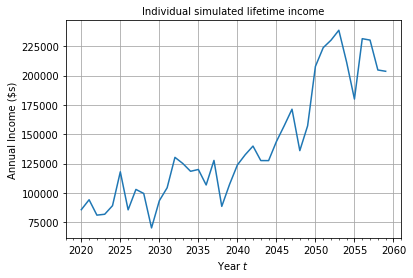

In [53]:
income = income_generator(p)
%matplotlib inline
year_vec = np.arange(p['start_year'], p['start_year'] + p['work_yrs'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')


**Question 2(B)**
The distribution has a bell shaped curve and is normally distributed.
4.48% of the simulations have income greater than $100,000
14.48% of the simulations have income less than $70,000


Text(0.5,1,'Number of Respondents in Income Bins')

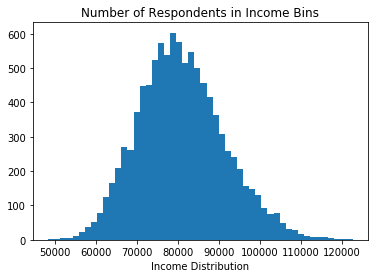

In [54]:
plt.hist(income[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.title("Number of Respondents in Income Bins")

In [55]:
def percent_more_than(x, batch):
    count = 0
    for val in batch:
        if val > x:
            #print(val, x, "greater than")
            count = count + 1
    return count*100/len(batch)

In [56]:
income1 = income[0,:]
percent_more_than(100000, income1)

4.48

In [57]:
def percent_less_than(x, batch):
    count = 0
    for val in batch:
        if val < x:
            count = count + 1
    return count*100/len(batch)

In [58]:
income1 = income[0,:]
percent_less_than(70000, income1)

14.48

**Question 2(C)**
In 16.63% of the simulations, loan was paid off within ten years

In [59]:

def loan_period_calculator(income, loan):
    loan_period = []
    for i in range(0, 10000):
        count = 0
        paid = 0
        j = 0
        while paid <= loan:
            installment = 0.1*income[j, i]
            paid = paid + installment
            j = j + 1
        loan_period.append(j)
    return loan_period

loan_period = loan_period_calculator(income, 95000)

Text(0.5,1,'Number of Respondents in Income Bins')

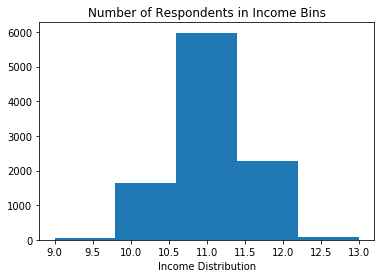

In [60]:

a = min(loan_period)
b = max(loan_period)
plt.hist(loan_period, bins = len(np.unique(loan_period)))
plt.xlabel("Income Distribution")
plt.title("Number of Respondents in Income Bins")

In [61]:
(np.unique(loan_period))

array([ 9, 10, 11, 12, 13])

In [62]:
counter = 0
for val in loan_period:
    if val <= 10:
        counter = counter + 1
percentage = counter*100/len(loan_period)
percentage
        


16.63

Text(0.5,1,'Number of Respondents in Income Bins')

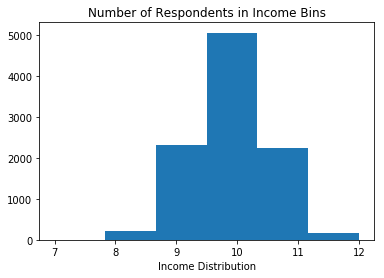

In [63]:
p['inc0'] = 90000
p['sigma'] = 0.17
income = income_generator(p)

loan_period = loan_period_calculator(income, 95000)
plt.hist(loan_period, bins = len(np.unique(loan_period)))
plt.xlabel("Income Distribution")
plt.title("Number of Respondents in Income Bins")

**Question 2(D)**
In 75,88% of the simulations loan was paid off within 10 years

In [64]:
counter = 0
for val in loan_period:
    if val <= 10:
        counter = counter + 1
percentage = counter*100/len(loan_period)
percentage

75.88

**Question 1(B)**
The author, Moretti, cites the work of Forrester (World Dynamics, 1971) to talk about dynamic feedback. A model is
used to analyze the stall effects of global economic growth on the environment. But the changes in environment in 
turn affects economic growth. Hence, dynamic feedback allows us to anlayze growth due to changes in the environment,
which were brought up by global economic growth in the first place. 

Example of a research question in Political Science which exhibits dynamic feedback:
Consider the following research question: Does high political trust result in implementation of good policies?
People put their faith in poilitcal parties which they think will work for the implementation of good policies. The
good policies in turn endow people with benefits and hence they increase their trust in those political parties,
resultantly, political party has to deliver more of good policies to maintain trust of their supporters.

**Question 1(A)**
The author defines validity as the degree to which the theoretical constructs and their computational iplementation
are representative of the real-world. The potential weaknesses in validity with regard to multi-agent systems stems
from the correctness of the underlying theory which is used to model the interactions between the different systems and
within those systems. What if the underlying theory is not true? Then we have a computational data which is 
not rightly explained. As a result, any degree of overlap between the theoretical constructs and computational data
would make little to no sense. Cellular automata is, in some sense, a special case of multi-agent systems so they also 
face the same problem of validation of the underlying theoryn as is the case with multi-agent systems. In addition to
this, cellular automata model involves updating of the states of different cells at a fixed period which doesnot aligns
well with the real world. For example, while modelling how the culture is changing within a society, not all 
individuals would update their beliefs at the same point of time. Hence, making the state transitions for every
individual at a fixed point is not a true representation.
